In [1]:
import tensorflow as tf
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
import pandas as pd

In FOOD101 dataset ,
101 class of each 750 training images
and testign images contain 250 images per class

In [2]:
(750*101 ,250*101)

(75750, 25250)

## Downloading and visualising dataset

In [3]:
import tensorflow_datasets as tfds
all_datasets_list = tfds.list_builders()

target_dataset="food101"
if target_dataset in all_datasets_list:
  print(f"{target_dataset} dataset found")

food101 dataset found


In [4]:
(train_data, test_data), ds_info = tfds.load(name=target_dataset, split=["train", "validation"], shuffle_files=True ,as_supervised=True, with_info=True)

# SPLIT- splits datasets
# shuffle_files= shuffle the files
# as_supervised if True then data samples get downloaded in tuple format or else in dictionary format
# with_info True to download dataset metadata (lables ,number of samples etc etc) which here gets stored in ds_info

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.3HM6MK_2.0.0/food101-train.tfrecord*...:   0%|         …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.3HM6MK_2.0.0/food101-validation.tfrecord*...:   0%|    …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [5]:
ds_info

tfds.core.DatasetInfo(
    name='food101',
    full_name='food101/2.0.0',
    description="""
    This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.
    """,
    homepage='https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/',
    data_dir=PosixGPath('/tmp/tmpemxc4adytfds'),
    file_format=tfrecord,
    download_size=4.65 GiB,
    dataset_size=4.77 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examp

In [6]:
print(ds_info.splits["train"])
print(ds_info.splits["validation"])

<SplitInfo num_examples=75750, num_shards=32>
<SplitInfo num_examples=25250, num_shards=16>


In [7]:
len(train_data) ,len(test_data)

(75750, 25250)

In [8]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

Total 101 classes 

In [9]:
class_names = ds_info.features["label"].names
print(f"Total classes : {len(class_names)}")
class_names[:10]

Total classes : 101


['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [10]:
print(f"Number of Training image: {ds_info.splits['train']} ")
print(f"Number of Training image: {ds_info.splits['validation']} ")

Number of Training image: <SplitInfo num_examples=75750, num_shards=32> 
Number of Training image: <SplitInfo num_examples=25250, num_shards=16> 


In [11]:
train_one_sample = train_data.take(1)
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

This means train_data is of length 75750 and each entry consists of (image and its corresponding label)

## Visualising a single image


  Image shape: (512, 512, 3)
  Image dtype: <dtype: 'uint8'>
  Target class from Food101 (tensor form): 65
  Class number (str form): 65
  Class name:mussels
    


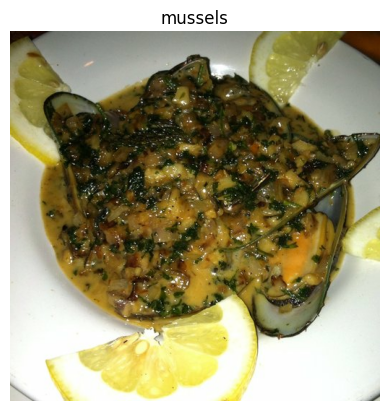

In [12]:
for image ,label in train_one_sample.take(1):
  print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class from Food101 (tensor form): {label}
  Class number (str form): {label.numpy()}
  Class name:{class_names[label.numpy()]}
    """)
  plt.imshow(image.numpy())
  plt.axis("off")
  plt.title(class_names[label.numpy()])

## Preprocessing data
1. Scaling 
2. Chaging data type to float32
2. Resizing shape
3. Creating batches

In [13]:
for imh ,label in test_data.take(1):
    print(imh.shape)

(512, 512, 3)


In [14]:
def preprocess_img(image,label ,img_shape=224):
    image=tf.image.resize(image ,[img_shape ,img_shape])
    return tf.cast(image ,tf.float32),label

Applying this preprocess_img function to a single image for testing

In [15]:
one_image=None
one_label=None
for image ,label in train_one_sample:
  one_image=image
  one_label=label

print("Before preprocessing" ,one_image)
print("Shape",one_image.shape)
print("dtype",one_image.dtype)
preprocessed_img = preprocess_img(image,label)
print("After preprocessing" ,preprocessed_img[0])
print("Shape",preprocessed_img[0].shape)
print("dtype",preprocessed_img[0].dtype)

Before preprocessing tf.Tensor(
[[[145 151 125]
  [157 163 137]
  [159 165 139]
  ...
  [197 209 199]
  [197 209 199]
  [197 207 198]]

 [[146 152 126]
  [156 162 136]
  [158 164 138]
  ...
  [197 209 199]
  [197 209 199]
  [199 209 200]]

 [[150 156 130]
  [155 161 135]
  [157 163 137]
  ...
  [197 209 199]
  [197 209 199]
  [199 209 198]]

 ...

 [[173 186 177]
  [174 187 178]
  [176 189 180]
  ...
  [181 197 187]
  [181 197 187]
  [178 195 187]]

 [[176 187 179]
  [176 187 179]
  [176 189 180]
  ...
  [182 198 188]
  [182 198 188]
  [180 197 189]]

 [[178 189 181]
  [177 188 180]
  [175 188 179]
  ...
  [179 195 185]
  [179 195 185]
  [179 196 190]]], shape=(512, 289, 3), dtype=uint8)
Shape (512, 289, 3)
dtype <dtype: 'uint8'>
After preprocessing tf.Tensor(
[[[147.19739 153.19739 127.19739]
  [157.22768 163.22768 137.22768]
  [158.09805 164.09805 138.09805]
  ...
  [197.      209.      197.54907]
  [197.      209.      199.     ]
  [198.09914 208.38936 199.24425]]

 [[154.69467 160.

(-0.5, 223.5, 223.5, -0.5)

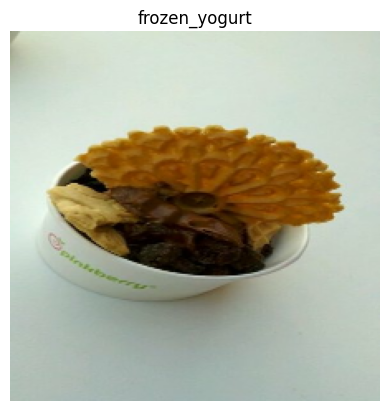

In [16]:
plt.imshow(preprocessed_img[0]/255.)
plt.title(class_names[ preprocessed_img[1] ])
plt.axis("off")


Original dataset- > map -> shuffle ->prefetcg ->prefetchdataset

In [17]:
train_data = train_data.map( preprocess_img , num_parallel_calls=tf.data.AUTOTUNE )
train_data = train_data.shuffle(1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
test_data = test_data.map(preprocess_img ,num_parallel_calls=tf.data.AUTOTUNE)
#donot need to shuffle test data
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)


In [19]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [20]:
for images , labels in train_data.take(1):
    print(images.shape)
    print(labels.shape)
    print("\n")
    print(labels.numpy())

(32, 224, 224, 3)
(32,)


[71 10 13 81 24 74 38 29  1  7 24 74 53 93 82 44 81 63 45  1 67 86 83 89
 94 68 74 29 89 57 59 59]


So each batch has 32 images and 32 labels corresponding to these images

## Definining callbacks
1. ModelCheckpoint
2. Tensorboard

1. Modelcheckpoint callback

In [21]:
checkpoint_path = "model_checkpoints.weights.h5"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=0
)

2. Tensorboard callback

In [22]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

## Setting up Mixed Precision Training

In [23]:
from tensorflow.keras import mixed_precision

In [24]:
print("Before setting policy")
mixed_precision.global_policy()

Before setting policy


<DTypePolicy "float32">

In [25]:
mixed_precision.set_global_policy(policy="mixed_float16")
print("After:")
mixed_precision.global_policy()

After:


<DTypePolicy "mixed_float16">

Since the global dtype policy is now "mixed_float16", model will automatically take advantage of float16 variables where possible and in turn speed up training.

## Building Feature Extraction model

**NOTE:** In final layer ,explicity mentioning the data type to be float32, so that the loss calculated is more accurate

In [26]:
input_shape=(224,224,3)

base_model =tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs = tf.keras.layers.Input(shape=input_shape ,name="Input_Layer")
x=base_model(inputs ,training=False)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(len(class_names))(x) #Here no activation used , i.e linear
outputs = tf.keras.layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [27]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 101)                 │         129,381 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_float32 (Activation)         │ (None, 101)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [28]:
for layer in model.layers:
    print(layer.name ,layer.trainable ,layer.dtype ,layer.dtype_policy)

Input_Layer True float32 <DTypePolicy "mixed_float16">
efficientnetb0 False float32 <DTypePolicy "mixed_float16">
global_average_pooling2d True float32 <DTypePolicy "mixed_float16">
dense True float32 <DTypePolicy "mixed_float16">
softmax_float32 True float32 <DTypePolicy "float32">


In [29]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
history_101_food_classes_feature_extract = model.fit(
    train_data,
    epochs=3,

    validation_data=test_data,
    validation_steps=int(0.15 * len(test_data)),
    callbacks=[create_tensorboard_callback("training_logs","efficientnetb0_101_classes_all_data_feature_extract"),
                                model_checkpoint]
)


Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extract/20250106-202842
Epoch 1/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 112s 37ms/step - accuracy: 0.4371 - loss: 2.4622 - val_accuracy: 0.6531 - val_loss: 1.3175
Epoch 2/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 115s 32ms/step - accuracy: 0.6303 - loss: 1.4463 - val_accuracy: 0.6753 - val_loss: 1.1860
Epoch 3/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 75s 31ms/step - accuracy: 0.6633 - loss: 1.2989 - val_accuracy: 0.6838 - val_loss: 1.1538


In [30]:
results_feature_extract_model = model.evaluate(test_data)
results_feature_extract_model

790/790 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6901 - loss: 1.1448


[1.1391701698303223, 0.694891095161438]

## Load and evaluate checkpoint weights

Making sure weight gets stored or not.

In [31]:
# same as earlier model
# for further experiments ,making a function for ease
def create_model():
  input_shape = (224, 224, 3)
  base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
  base_model.trainable = False
  inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")
  x = base_model(inputs, training=False) 
  x = tf.keras.layers.GlobalAveragePooling2D(name="pooling_layer")(x)
  x = tf.keras.layers.Dense(len(class_names))(x) 
  # Separate activation of output layer so can output float32 activations
  outputs = tf.keras.layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x) 
  model = tf.keras.Model(inputs, outputs)
  
  return model

created_model = create_model()
created_model.compile(loss="sparse_categorical_crossentropy",
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])


created_model.load_weights("/kaggle/working/model_checkpoints.weights.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'loss_scale_optimizer', because it has 4 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [32]:
results_created_model_with_loaded_weights = created_model.evaluate(test_data)
results_created_model_with_loaded_weights

790/790 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.6945 - loss: 1.1208


[1.116246223449707, 0.6988911032676697]

## FINE TUNING

In [33]:
for layer in model.layers:
    layer.trainable=True
    

In [34]:
for layer in model.layers:
    print(layer.name, layer.trainable)

Input_Layer True
efficientnetb0 True
global_average_pooling2d True
dense True
softmax_float32 True


In [35]:
for layer in base_model.layers:
    print(layer.trainable)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


So every layer in base model is trainable

In [36]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 101)                 │         129,381 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_float32 (Activation)         │ (None, 101)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,437,720 (16.93 MB)

 Trainable params: 4,136,929 (15.78 MB)

 Non-trainable params: 42,023 (164.16 KB)

 Optimizer params: 258,768 (1010.82 KB)

Creating some more callbacks

The EarlyStopping callback monitors a specified model performance metric (e.g. val_loss) and when it stops improving for a specified number of epochs, automatically stops training.

Using the EarlyStopping callback combined with the ModelCheckpoint callback saving the best performing model automatically, we could keep our model training for an unlimited number of epochs until it stops improving

In [37]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3)

In [38]:
checkpoint_path = "fine_tune_checkpoints.keras"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      monitor="val_loss")






ReduceLROnPlateau callback montiors a specified metric and when that metric stops improving, it reduces the learning rate by a specified factor (e.g. divides the learning rate by 10).
eg initially learning rate is 0.001 and then reduces to 0.0002 (10 times smaller) if the metrics that is specified stops improving

to make sure the learning rate doesn't get too low (and potentially result in our model learning nothing), we'll set the minimum learning rate to 1e-7.

In [39]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2, # reductin by 10x
                                                 patience=2,
                                                 verbose=1,
                                                 min_lr=1e-7)

In [40]:

# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
                        optimizer=tf.keras.optimizers.Adam(0.0001), # since fine tuning hence 10x smaller learning rate
                        metrics=["accuracy"])

In [41]:
history_101_food_classes_all_data_fine_tune = model.fit(train_data,
                                                        epochs=100, 
                                                        steps_per_epoch=len(train_data),
                                                        validation_data=test_data,
                                                        validation_steps=int(0.15 * len(test_data)),
                                                        callbacks=[create_tensorboard_callback("training_logs", "efficientb0_101_classes_all_data_fine_tuning"), # track the model training logs
                                                                   model_checkpoint, # save only the best model during training
                                                                   early_stopping, # stop model after X epochs of no improvements
                                                                   reduce_lr]) # reduce the learning rate after X epochs of no improvements

Saving TensorBoard log files to: training_logs/efficientb0_101_classes_all_data_fine_tuning/20250106-203451
Epoch 1/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 338s 107ms/step - accuracy: 0.6177 - loss: 1.5065 - val_accuracy: 0.7905 - val_loss: 0.7466 - learning_rate: 1.0000e-04
Epoch 2/100


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7924 - val_loss: 0.7543 - learning_rate: 1.0000e-04
Epoch 3/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 213s 90ms/step - accuracy: 0.7880 - loss: 0.7874 - val_accuracy: 0.8093 - val_loss: 0.6573 - learning_rate: 1.0000e-04
Epoch 4/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8215 - val_loss: 0.6584 - learning_rate: 1.0000e-04
Epoch 5/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 210s 88ms/step - accuracy: 0.8512 - loss: 0.5452 - val_accuracy: 0.8337 - val_loss: 0.6294 - learning_rate: 1.0000e-04
Epoch 6/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8249 - val_loss: 0.6448 - learning_rate: 1.0000e-04
Epoch 7/100
2367/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.8916 - loss: 0.4011
Epoch 7: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
2368/2368 ━━━━━━━━━━

In [42]:
model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.8240 - loss: 0.6493


[0.6473377346992493, 0.8236039876937866]

In [43]:
print("Achieved accuracy",0.8102574348449707)

Achieved accuracy 0.8102574348449707


## Testing on a batch of test data

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


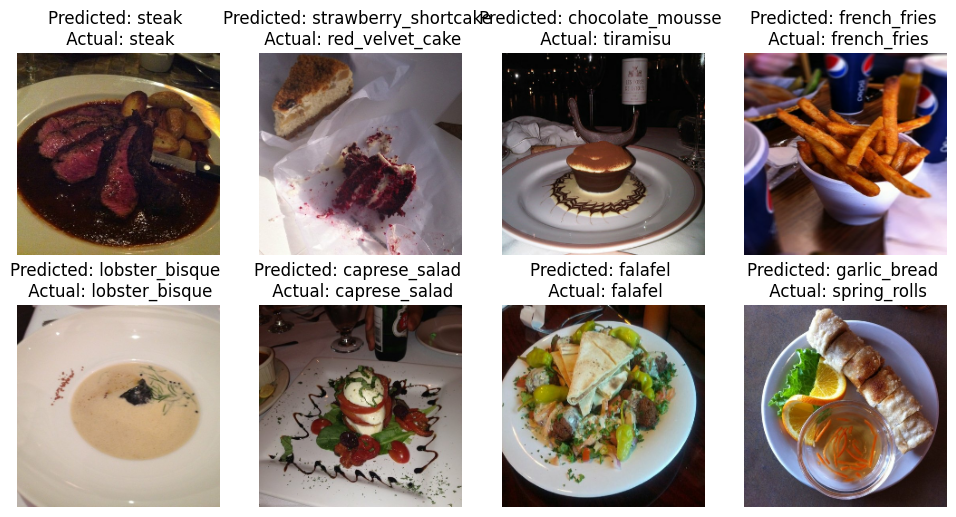

In [44]:
for images ,labels in test_data.take(1):
    images_cnt=0
    fig,ax=plt.subplots(2,4,figsize=(12,6))
    # prediction
    predictions_probs = model.predict(images)
    predicted_classes = predictions_probs.argmax(axis=1) 
    predicted_labels = [class_names[i] for i in predicted_classes]

    # truth 
    grouth_truth = [ class_names[label] for label in labels ]
    
    for i in range(2):
        for j in range(4):
            ax[i][j].imshow(images[images_cnt]/255.)
            ax[i,j].axis("off")
            ax[i,j].set_title(f"Predicted: {predicted_labels[images_cnt]} \n Actual: {grouth_truth[images_cnt]}")
            images_cnt+=1
            if images_cnt==8:
                break
        if images_cnt==8:
            break


    

    
        

## Finding the top 5 accuracy

In [45]:
print("Number of batches in testing data is:->",len(test_data))

Number of batches in testing data is:-> 790


In [46]:
classified_correctly=0
miss_classified=0
total_images=0
for images,labels in test_data:
    # prediction
    preds_probs =model.predict(images ,verbose=0)
    for img_num in range( preds_probs.shape[0] ):
        ground_truth=labels[img_num]
        total_images+=1
        predictions_with_indices = list(enumerate(preds_probs[img_num]))
        predictions_with_indices.sort(key=lambda x: x[1], reverse=True)
        # print(predictions_with_indices)
        for k in range(5):
            # print(predictions_with_indices[k][0])
            if ground_truth == predictions_with_indices[k][0]:
                classified_correctly+=1
    

    
print("Done")

Done


In [47]:
classified_correctly ,total_images

(24239, 25250)

In [48]:
top_5_accuracy=round(classified_correctly/total_images,4)
print("Top 5 accuracy is",round(classified_correctly/total_images,4))

Top 5 accuracy is 0.96


In [49]:
ACCURACY =pd.DataFrame({"Top1":[0.8102]    ,"Top 5 accuracy": [top_5_accuracy]  } )
ACCURACY

,Top1,Top 5 accuracy
0,0.8102,0.96
